# Optimization of genetic algorithm parameter in hybrid genetic algorithm-neural network modelling: Application to spray drying of coconut milk.

In [2]:
!pip install geneticalgorithm

  Obtaining dependency information for geneticalgorithm from https://files.pythonhosted.org/packages/ac/d2/fb9061239eaeee5c0373844f27f43514f33201bc08aea54d65b437402966/geneticalgorithm-1.0.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/44.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/44.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/44.3 kB ? eta -:--:--
     --------- ------------------------------ 10.2/44.3 kB ? eta -:--:--
     --------- ------------------------------ 10.2/44.3 kB ? eta -:--:--
     --------- ------------------------------ 10.2/44.3 kB ? eta -:--:--
     --------- ------------------------------ 10.2/44.3 kB ? eta -:--:--
     --------- ------------------------------ 10.2/44.3 kB ? eta -:--:--
     --------- ------------------------------ 10.2/44.3 kB ? eta -:--:--
     --------- ------------------------------ 10.2/44.3 kB ? eta -:--:--
     --------- ------------------------------ 10.2/44.3 

In [3]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from geneticalgorithm import geneticalgorithm as ga
import warnings

numpy: Used for creating and handling numerical data.

train_test_split: Splits your dataset into training and validation sets.

MLPRegressor: This is your neural network model for regression tasks.

geneticalgorithm: This library lets you perform optimization using Genetic Algorithm (GA).

warnings: To suppress any unwanted warnings during model training.


In [4]:
# Define functions for genetic algorithm fitness evaluation and neural network training
def fitness_function(params):
    # Decode parameters
    hidden_layer_sizes = (int(params[0]),) * int(params[1])
    activation = ['identity', 'logistic', 'tanh', 'relu'][int(params[2])]
    solver = ['lbfgs', 'sgd', 'adam'][int(params[3])]
    
    # Create and train neural network
    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver)
    model.fit(X_train, y_train)
    
    # Evaluate fitness (example: mean squared error)
    fitness = -model.score(X_val, y_val)
    
    return fitness

params is a list of numbers the GA is trying to optimize:

params[0]: Number of neurons in each hidden layer.

params[1]: Number of hidden layers.

params[2]: Activation function (0=identity, 1=logistic, 2=tanh, 3=relu).

params[3]: Solver (0=lbfgs, 1=sgd, 2=adam).

In [5]:
def train_neural_network(params):
    # Decode parameters
    hidden_layer_sizes = (int(params[0]),) * int(params[1])
    activation = ['identity', 'logistic', 'tanh', 'relu'][int(params[2])]
    solver = ['lbfgs', 'sgd', 'adam'][int(params[3])]
    
    # Create and train neural network
    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver)
    model.fit(X_train, y_train)
    
    # Evaluate neural network performance on validation data
    validation_error = -model.score(X_val, y_val)
    
    return validation_error

In [6]:
# Load your dataset
np.random.seed(42)

# Assuming you have features like temperature, humidity, etc., and you want to predict drying time
num_samples = 1000
num_features = 5  # Adjust based on your actual features

# Generate synthetic features
X = np.random.rand(num_samples, num_features)

# Generate synthetic target variable (drying time)
# Here, we'll assume a linear relationship with some noise
true_coefficients = np.random.rand(num_features) * 10  # Random coefficients for features
noise = np.random.normal(loc=0, scale=1, size=num_samples)  # Gaussian noise
y = np.dot(X, true_coefficients) + noise

 The best solution found:                                                                           
 [32.  3.  3.  1.]

 Objective function:
 -0.9542020528953552


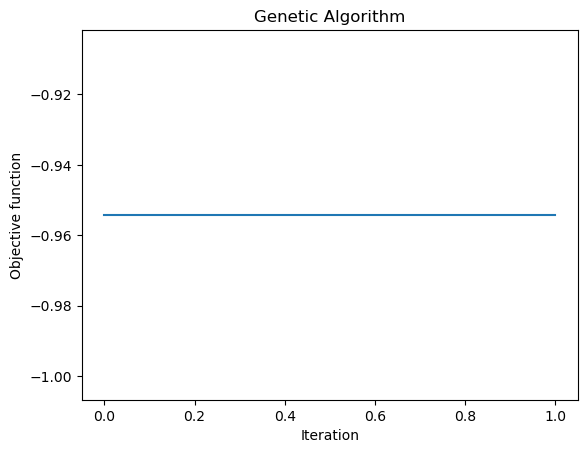

In [7]:
# Example: Replace X_train, X_val, y_train, y_val with your dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

warnings.filterwarnings("ignore")

# Define genetic algorithm parameters
number_of_parameters = 4  # Adjust based on the number of parameters you want to optimize
varbound = np.array([[5, 50],  # Range for number of neurons in each hidden layer
                     [1, 5],    # Range for number of hidden layers
                     [0, 3],    # Activation function: 0 for identity, 1 for logistic, 2 for tanh, 3 for relu
                     [0, 2]])   # Solver: 0 for lbfgs, 1 for sgd, 2 for adam
algorithm_param = {'max_num_iteration': 1, 'population_size': 100, 'mutation_probability': 0.1,
                   'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3,
                   'crossover_type': 'uniform', 'max_iteration_without_improv': None}
model = ga(function=fitness_function, dimension=number_of_parameters, variable_type='int', variable_boundaries=varbound,
           algorithm_parameters=algorithm_param)

# Run the genetic algorithm
model.run()

In [8]:
# Get the best parameters found by the genetic algorithm
best_params = model.output_dict['variable']

# Train neural network with the best parameters
validation_error = train_neural_network(best_params)

print("Best parameters found by genetic algorithm:", best_params)
print("Validation error of neural network:", validation_error)

# Optionally, you can further evaluate the neural network on a test set
# and perform any additional analysis or visualization

Best parameters found by genetic algorithm: [32.  3.  3.  1.]
Validation error of neural network: -0.9529522583523036
